In [1]:
!pip install google-play-scraper

In [2]:
#!pip install -qq google_play_scraper
!pip install -q transformers

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [4]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
bizapp = reviews_all('com.bizappng',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [5]:
bizapp

[{'reviewId': '2d334e6e-6936-4f1e-aabe-ec8f8966bdb4',
  'userName': 'EROS',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWFGGBqpLGddbnlg4qNnXAAlI1bV_ZxhTv7m8Ehkwl99Z6tCWQ',
  'content': "This app is utter rubbish it doesn't deserve to be in the playstore Their charges are too high And the app doesn't do it's primary function They are other apps too get data this one is a waste of time, their customer service doesn't even work",
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.1',
  'at': datetime.datetime(2024, 12, 20, 12, 48, 39),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.0.1'},
 {'reviewId': 'a88f514d-0a4a-4ade-9711-e7e89c003983',
  'userName': 'MUSTAFA ABDULLAHI',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUuF64IW7YjvOdt3Y6IhYOxBD36gB-mIzLUsrGrJ6t0NoJfs1-5',
  'content': 'Scam data platform dont agree with them',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.1',
  'at': datetime.dateti

In [6]:
# convert the json data into a dataframe
bizapp_df = pd.json_normalize(bizapp)

In [7]:
bizapp_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2d334e6e-6936-4f1e-aabe-ec8f8966bdb4,EROS,https://play-lh.googleusercontent.com/a-/ALV-U...,This app is utter rubbish it doesn't deserve t...,1,0,1.0.1,2024-12-20 12:48:39,None,NaT,1.0.1
1,a88f514d-0a4a-4ade-9711-e7e89c003983,MUSTAFA ABDULLAHI,https://play-lh.googleusercontent.com/a-/ALV-U...,Scam data platform dont agree with them,5,0,1.0.1,2024-12-13 08:00:56,None,NaT,1.0.1
2,bd6d2eee-8ff7-4db5-86c3-9ead8c063405,Galadima Attahiru,https://play-lh.googleusercontent.com/a-/ALV-U...,Very poor network scammers everywhere,1,0,1.0.1,2024-12-04 09:09:40,None,NaT,1.0.1
3,d60cc64f-05b3-4f28-b334-ccbddd49ecf7,Aeesha Salawu,https://play-lh.googleusercontent.com/a-/ALV-U...,It's the worst app ever,1,0,1.0.1,2024-12-04 07:04:06,None,NaT,1.0.1
4,d0abfacc-2846-4764-b7f8-6d08f3bbf8fa,Abdulwahab Lawan,https://play-lh.googleusercontent.com/a-/ALV-U...,This is the worst app that ever existed on pla...,1,0,1.0.1,2024-11-30 22:15:40,None,NaT,1.0.1


In [8]:
bizapp_df.shape


(205, 11)

In [9]:
bizapp_df['score'].value_counts()

1    122
5     59
3     10
2      8
4      6
Name: score, dtype: int64

## Sentiment Analysis

In [10]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = r"C:\Users\addis\Downloads\etl"



In [11]:
# pip install --upgrade pip

In [12]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [13]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)



pytorch_model.bin:   8%|8         | 115M/1.42G [00:00<?, ?B/s]

C:\Users\addis\anaconda3\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\addis\.cache\huggingface\hub\models--siebert--sentiment-roberta-large-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu
Device set to use cpu


In [14]:
# Test the reused model
# play with the parameter and see if it works

result = sentiment_analysis_reuse("I love this app")
print(result)

[{'label': 'POSITIVE', 'score': 0.9988906979560852}]


In [15]:
#removing wildcharacter and cleaning the content column by casting to a str
bizapp_df['content_new']= bizapp_df['content'].astype('str')

In [16]:
bizapp_df['result'] =bizapp_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x, truncation=True, max_length=512))

In [17]:
bizapp_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,2d334e6e-6936-4f1e-aabe-ec8f8966bdb4,EROS,https://play-lh.googleusercontent.com/a-/ALV-U...,This app is utter rubbish it doesn't deserve t...,1,0,1.0.1,2024-12-20 12:48:39,None,NaT,1.0.1,This app is utter rubbish it doesn't deserve t...,"[{'label': 'NEGATIVE', 'score': 0.999513149261..."
1,a88f514d-0a4a-4ade-9711-e7e89c003983,MUSTAFA ABDULLAHI,https://play-lh.googleusercontent.com/a-/ALV-U...,Scam data platform dont agree with them,5,0,1.0.1,2024-12-13 08:00:56,None,NaT,1.0.1,Scam data platform dont agree with them,"[{'label': 'NEGATIVE', 'score': 0.999424219131..."
2,bd6d2eee-8ff7-4db5-86c3-9ead8c063405,Galadima Attahiru,https://play-lh.googleusercontent.com/a-/ALV-U...,Very poor network scammers everywhere,1,0,1.0.1,2024-12-04 09:09:40,None,NaT,1.0.1,Very poor network scammers everywhere,"[{'label': 'NEGATIVE', 'score': 0.999480426311..."
3,d60cc64f-05b3-4f28-b334-ccbddd49ecf7,Aeesha Salawu,https://play-lh.googleusercontent.com/a-/ALV-U...,It's the worst app ever,1,0,1.0.1,2024-12-04 07:04:06,None,NaT,1.0.1,It's the worst app ever,"[{'label': 'NEGATIVE', 'score': 0.999494314193..."
4,d0abfacc-2846-4764-b7f8-6d08f3bbf8fa,Abdulwahab Lawan,https://play-lh.googleusercontent.com/a-/ALV-U...,This is the worst app that ever existed on pla...,1,0,1.0.1,2024-11-30 22:15:40,None,NaT,1.0.1,This is the worst app that ever existed on pla...,"[{'label': 'NEGATIVE', 'score': 0.999479353427..."


In [18]:
# spliting the result into sentiment and score
bizapp_df['sentiment'] = bizapp_df['result'].apply(lambda x: (x[0]['label']))
bizapp_df['score'] = bizapp_df['result'].apply(lambda x: (x[0]['score']))

In [19]:
bizapp_df[['content','score','sentiment']]

,content,score,sentiment
0,This app is utter rubbish it doesn't deserve t...,0.999513,NEGATIVE
1,Scam data platform dont agree with them,0.999424,NEGATIVE
2,Very poor network scammers everywhere,0.999480,NEGATIVE
3,It's the worst app ever,0.999494,NEGATIVE
4,This is the worst app that ever existed on pla...,0.999479,NEGATIVE
...,...,...,...
200,Amazing,0.998612,POSITIVE
201,Why can't i get an OTP? It seems i am having d...,0.999156,NEGATIVE
202,I am fully satisfied with the application and ...,0.998901,POSITIVE
203,Highly awesome app for business and chart acti...,0.998821,POSITIVE


In [20]:
bizapp_df.value_counts('sentiment', normalize = True)

sentiment
NEGATIVE    0.643902
POSITIVE    0.356098
dtype: float64

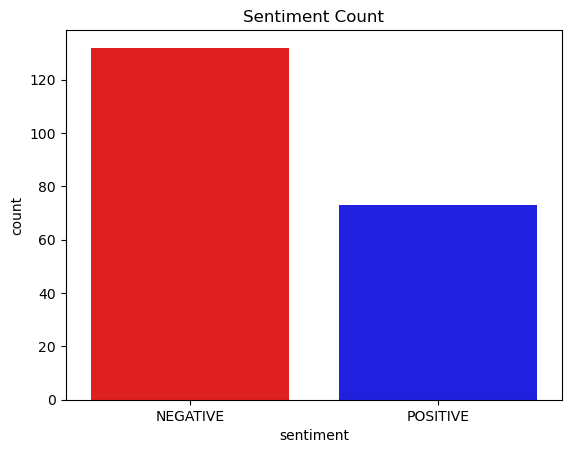

In [21]:
sns.countplot(x = 'sentiment', data = bizapp_df, palette=["red", "blue"])
plt.title('Sentiment Count')
plt.show()
# bizapp_df['sentiment'].value_counts().plot(kind='bar');

## Topic modeling

In [22]:
#generate a series for the reviews
feature_google=bizapp_df['content']
print(feature_google.size)
feature_google.head()

205


0    This app is utter rubbish it doesn't deserve t...
1              Scam data platform dont agree with them
2                Very poor network scammers everywhere
3                              It's the worst app ever
4    This is the worst app that ever existed on pla...
Name: content, dtype: object

In [25]:
# Import the necessary libraries
!pip install textblob      

import textblob
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())


   ---------------------------------------- 626.3/626.3 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
0    This app is utter rubbish it doesn't deserve t...
1              Scam data platform dont agree with them
2                Very poor network scammers everywhere
3                              It's the worst app ever
4    This is the worst app that ever existed on pla...
Name: content, dtype: object


In [26]:
!pip install bertopic

   -------------------------------------- 811.2/811.2 kB 857.9 kB/s eta 0:00:00


In [27]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.astype(str))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [28]:
topic_model.get_topic_info().head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,5,-1_baya_ko_akwaixaraha_alhaji,"[baya, ko, akwaixaraha, alhaji, yasa, yanzu, y...","[Me yasa baya transfer, yallabai yayya tsarin ..."
1,0,173,0_app_to_this_the,"[app, to, this, the, is, and, my, it, money, but]",[The biggest scammers I ever seen. Send your m...
2,1,27,1_good_amazing_excellent_like,"[good, amazing, excellent, like, wow, nice, ve...","[Good, Good, Good]"


In [29]:
bizapp_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [30]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
bizapp_df.to_excel(output_file, index=False)

In [31]:
!pip install mysql-connector-python --upgrade

   ---------------------------------------- 16.1/16.1 MB 2.5 MB/s eta 0:00:00


# ETL code

In [32]:
dataframe=bizapp_df

In [33]:

data = [tuple(row) for row in bizapp_df.to_numpy()]


In [34]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")


Column 'result' contains list values.


In [35]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )


In [37]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)


In [38]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': 'fati1234',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Database 'playstore_reviews' does not exist. Creating it...
Database 'playstore_reviews' created successfully!
Table `playstore_reviews` created successfully!
205 rows inserted/updated successfully!
MySQL connection closed.


In [39]:
df = pd.read_excel('playstore_reviews.xlsx')